In [1]:
import numpy as np
from datascience import *

# Configure notebook (happens automatically on data8.berkeley.edu)
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

In [83]:
def total_variation_distance(column, other):
    return sum(np.abs(column - other)) / 2

In [84]:
jury = Table(["Race", "Eligible", "Panel"]).with_rows([
    ["Asian",  0.15, 0.26],
    ["Black",  0.18, 0.08],
    ["Latino", 0.12, 0.08],
    ["White",  0.54, 0.54],
    ["Other",  0.01, 0.04],
    ])
jury.set_format([1, 2], PercentFormatter(0))

Race,Eligible,Panel
Asian,15%,26%
Black,18%,8%
Latino,12%,8%
White,54%,54%
Other,1%,4%


In [85]:
total_variation_distance(jury.column(1), jury.column(2))

0.14000000000000001

In [86]:
panel_size = 1453
jury.sample_from_distribution("Eligible", panel_size)

Race,Eligible,Panel,Eligible sample
Asian,15%,26%,212
Black,18%,8%,263
Latino,12%,8%,164
White,54%,54%,801
Other,1%,4%,13


In [87]:
def empirical_distribution(table, label, sample_size, k, f):
    stats = Table(['Sample #', 'Statistic'])
    for i in np.arange(k):
        sample = table.sample_from_distribution(label, sample_size)
        statistic = f(sample)
        stats.append([i, statistic])
    return stats

In [88]:
def tvd_from_eligible(sample):
    counts = sample.column('Eligible sample')
    distribution = counts / sum(counts)
    return total_variation_distance(jury.column('Eligible'), distribution)

empirical_distribution(jury, 'Eligible', panel_size, 1000, tvd_from_eligible)

Sample #,Statistic
0,0.0200275
1,0.00966965
2,0.0295802
3,0.0240193
4,0.0207158
5,0.00758431
6,0.0151893
7,0.0166208
8,0.00952512
9,0.0183207


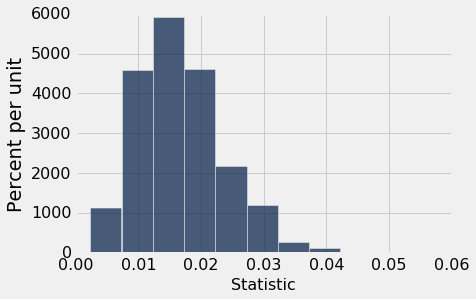

In [89]:
empirical_distribution(jury, 'Eligible', panel_size, 1000, tvd_from_eligible).hist(1)

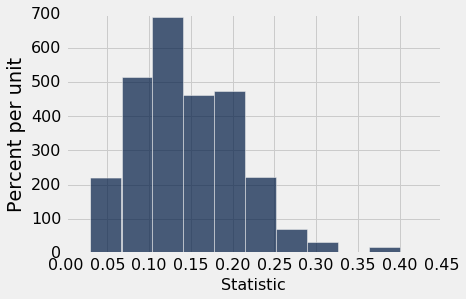

In [90]:
empirical_distribution(jury, 'Eligible', 20, 1000, tvd_from_eligible).hist(1)

In [91]:
jury.sample_from_distribution('Eligible', 20)

Race,Eligible,Panel,Eligible sample
Asian,15%,26%,4
Black,18%,8%,4
Latino,12%,8%,3
White,54%,54%,9
Other,1%,4%,0


## Chi-Squared

In [92]:
eligible = jury.column("Eligible") 
panel = jury.column("Panel")

In [93]:
sum((eligible - panel) ** 2 / eligible) * panel_size

348.07422222222226

In [94]:
def chi_squared(dist, other, sample_size):
    return sum((dist - other) ** 2 / dist) * sample_size
chi_squared(eligible, panel, panel_size)

348.07422222222226

In [95]:
chi_squared(panel, eligible, panel_size)

310.99788461538458

In [96]:
def X2_eligible(sample):
    counts = sample.column('Eligible sample')
    distribution = counts / sum(counts)
    return chi_squared(eligible, distribution, sum(counts))

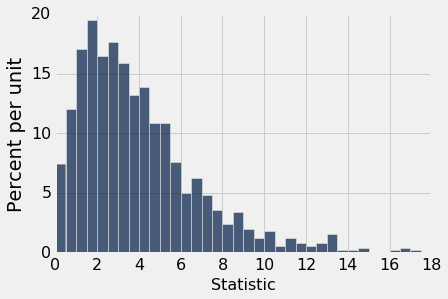

In [97]:
X2s = empirical_distribution(jury, 'Eligible', panel_size, 1000, X2_eligible)
X2s.hist(1, bins=np.arange(0, 18, 0.5))

In [98]:
np.mean(X2s.column(1))

4.0152142438377814

## Swain vs. Alabama

In [99]:
alabama = Table(['Race', 'Eligible']).with_rows([
    ["Black", 0.26],
    ["Other", 0.74]
])
alabama.set_format(1, PercentFormatter(0))

Race,Eligible
Black,26%
Other,74%


In [100]:
def num_black(sample):
    return sample.where('Race', 'Black').column('Eligible sample').item(0)

black_in_sample = empirical_distribution(alabama, 'Eligible', 100, 10000, num_black)
black_in_sample

Sample #,Statistic
0,32
1,24
2,26
3,25
4,32
5,28
6,28
7,28
8,26
9,24


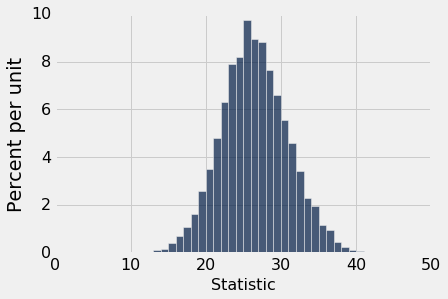

In [101]:
black_in_sample.hist(1, bins=np.arange(0, 50, 1))